In [2]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel|BES_reduced|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (463, 14)


In [16]:
def get_dta_meta(fn):
    reader = pd.io.stata.StataReader( fn )
    header = reader.variable_labels()
    labels = reader.value_labels()
    return header,labels
BESheader,BESlabels = get_dta_meta(BES_data_folder+"W20_only"+os.sep+"BES2019_W20_v0.1-3.dta")

In [5]:
search(BES_reduced_with_na,"euref")

p_eurefvote_I voted to leave         27230
p_eurefturnout_Yes                   30997
euRefVoteAfter_Stay out of the EU    27371
dtype: int64

In [6]:
search(BES_reduced_with_na,"redist")

redistSelf__Government should be less concerned about equal incomes      27609
redistCon__Government should be less concerned about equal incomes       23492
redistLab__Government should be less concerned about equal incomes       23159
redistLD__Government should be less concerned about equal incomes        20141
redistSNP__Government should be less concerned about equal incomes        1956
redistBrexit__Government should be less concerned about equal incomes    18317
redistGreen__Government should be less concerned about equal incomes     18425
dtype: int64

AttributeError: 'Line2D' object has no property 'weights'

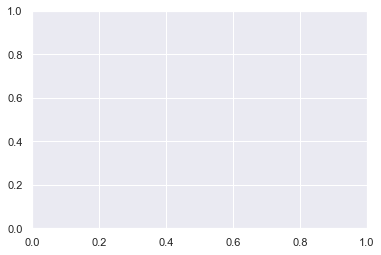

In [14]:
sns.lineplot(data=BES_reduced_with_na,
             x="redistSelf__Government should be less concerned about equal incomes",
             y="p_eurefvote_I voted to leave",
             weights=BES_Panel["wt"])

In [12]:
bool_cols = BES_reduced_with_na.select_dtypes('boolean').columns
BES_reduced_with_na[bool_cols] = BES_reduced_with_na[bool_cols].astype('float32')

In [17]:
coronaMeasures = BES_Panel[search(BES_Panel,"coronaMeasures2_").index]
coronaMeasures["wt"] = BES_Panel["wt"]
coronaMeasures = coronaMeasures.melt(id_vars="wt")

coronaMeasures["variable"] = coronaMeasures["variable"].apply(lambda x: BESheader[x])
coronaMeasures["variable"] = coronaMeasures["variable"].apply(lambda x: x.replace("To tackle coronavirus Britain should: ",""))
coronaMeasures["value"] = coronaMeasures["value"].replace({"Don't know":"DK","No":"NO","Yes":"YES"})
coronaMeasures["value"] = coronaMeasures["value"].astype('category').cat.reorder_categories(["YES","NO","DK"])

# No/Yes/DK

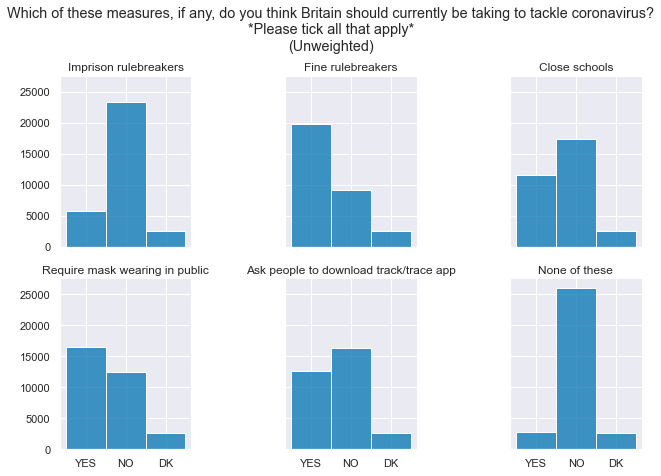

In [18]:
g = sns.FacetGrid(coronaMeasures, col="variable",col_wrap=3);
g.map_dataframe(sns.histplot, x="value",weights="wt");
g.set_titles(col_template="{col_name}");
g.fig.suptitle('Which of these measures, if any, do you think Britain should currently be taking to tackle coronavirus?\n*Please tick all that apply*\n(Unweighted)',y=1.10);

In [19]:
coronaMeasures

,wt,variable,value
0,0.661776,Imprison rulebreakers,NO
1,0.555841,Imprison rulebreakers,YES
2,0.681199,Imprison rulebreakers,NO
3,0.777926,Imprison rulebreakers,NO
4,0.748275,Imprison rulebreakers,NO
...,...,...,...
188803,0.539279,None of these,YES
188804,0.589397,None of these,NO
188805,0.699022,None of these,NO
188806,0.628405,None of these,NO


In [20]:
df = BES_Panel[["p_eurefvote","redistSelf","wt"]]

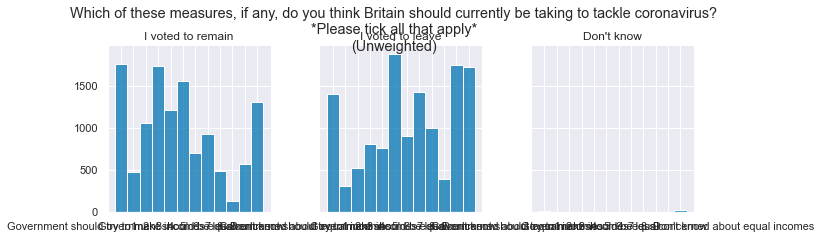

In [23]:
g = sns.FacetGrid(df, col="p_eurefvote",col_wrap=3);
g.map_dataframe(sns.histplot, x="redistSelf",weights="wt");
g.set_titles(col_template="{col_name}");
g.fig.suptitle('Which of these measures, if any, do you think Britain should currently be taking to tackle coronavirus?\n*Please tick all that apply*\n(Unweighted)',y=1.10);

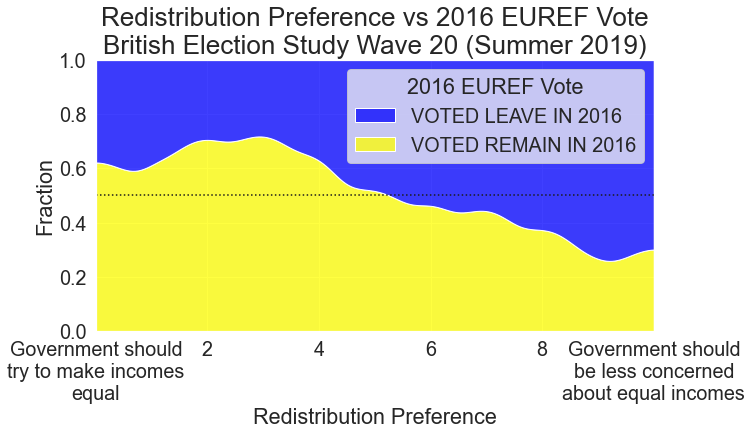

In [73]:
# 16:9
fig_x_size=10
plt.figure(figsize=(fig_x_size,fig_x_size*8/16));
sns.set(font_scale=1.8);
df = BES_Panel[["p_eurefvote","redistSelf","wt"]]
df["redistSelf"] = df["redistSelf"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["p_eurefvote"]=df["p_eurefvote"].replace({"I voted to leave":"VOTED LEAVE IN 2016",
                                             "I voted to remain":"VOTED REMAIN IN 2016",
                                             "Don't know":np.nan})

df.columns = ["2016 EUREF Vote","Redistribution Preference","wt"]
sns.kdeplot(data=df,x="Redistribution Preference",hue="2016 EUREF Vote",weights="wt",cut=0,multiple="fill",
           palette=["blue","yellow"]);
import textwrap
x_ticks_labels = [textwrap.fill(x, 19) for x in BES_Panel["redistSelf"].cat.categories[::2]]
plt.xticks(range(0,11,2),x_ticks_labels);
plt.title("Redistribution Preference vs 2016 EUREF Vote\nBritish Election Study Wave 20 (Summer 2019)",
         fontsize=26);
plt.hlines(0.5,0.0,10.0,linestyles='dotted');
plt.ylabel("Fraction");